Mean Squared Error: 20.470251397448763
Mean Absolute Error: 2.98472831861388


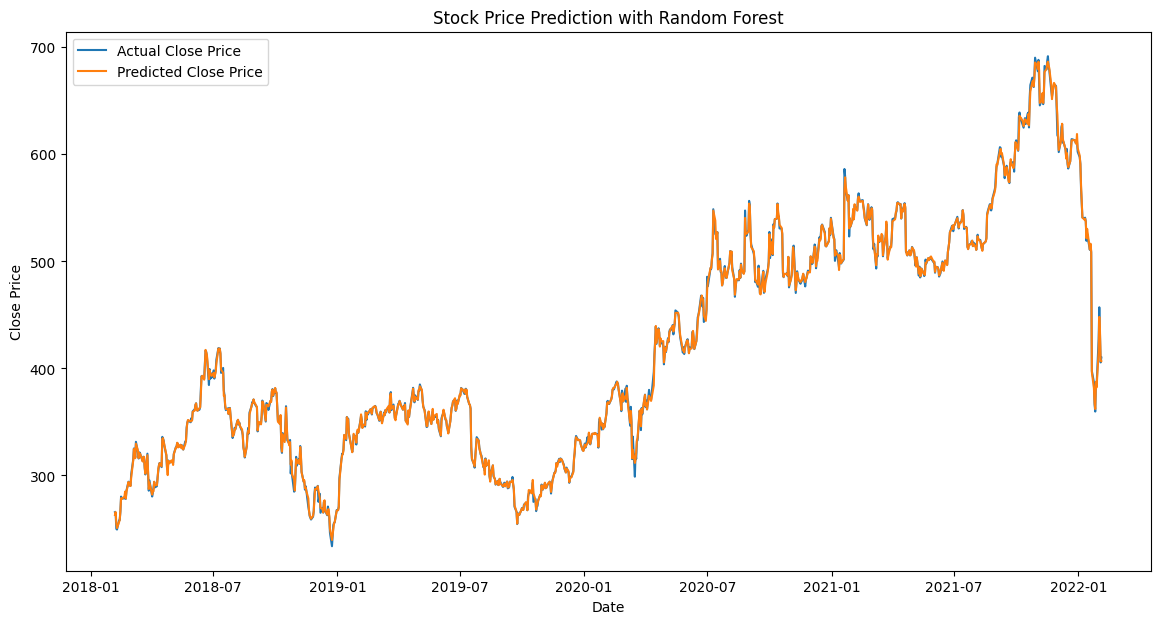

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the Excel file
data = pd.read_excel('/content/dataset.xlsx.xlsx')

# Step 2: Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Creating additional features
data['Previous_Close'] = data['Close'].shift(1)
data['High_Low_Diff'] = data['High'] - data['Low']
data['Open_Close_Diff'] = data['Open'] - data['Close']

# Drop rows with NaN values
data.dropna(inplace=True)

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume', 'Previous_Close', 'High_Low_Diff', 'Open_Close_Diff']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Step 5: Make Predictions on Entire Dataset
X_scaled = scaler.transform(X)
data['Predicted_Close'] = model.predict(X_scaled)

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(data.index, data['Predicted_Close'], label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction with Random Forest')
plt.legend()
plt.show()


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/20
24/24 [==============================] - 8s 99ms/step - loss: 0.0248 - val_loss: 0.0122
Epoch 2/20
24/24 [==============================] - 1s 59ms/step - loss: 0.0033 - val_loss: 0.0070
Epoch 3/20
24/24 [==============================] - 1s 59ms/step - loss: 0.0024 - val_loss: 0.0061
Epoch 4/20
24/24 [==============================] - 1s 58ms/step - loss: 0.0021 - val_loss: 0.0058
Epoch 5/20
24/24 [==============================] - 1s 57ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 6/20
24/24 [==============================] - 2s 79ms/step - loss: 0.0021 - val_loss: 0.0053
Epoch 7/20
24/24 [==============================] - 2s 97ms/step - loss: 0.0020 - val_loss: 0.0052
Epoch 8/20
24/24 [==============================] - 2s 89ms/step - loss: 0.0020 - val_loss: 0.0055
Epoch 9/20
24/24 [==============================] - 2s 64ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 10/20
24/24 [==============================] - 1s 60ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 11/

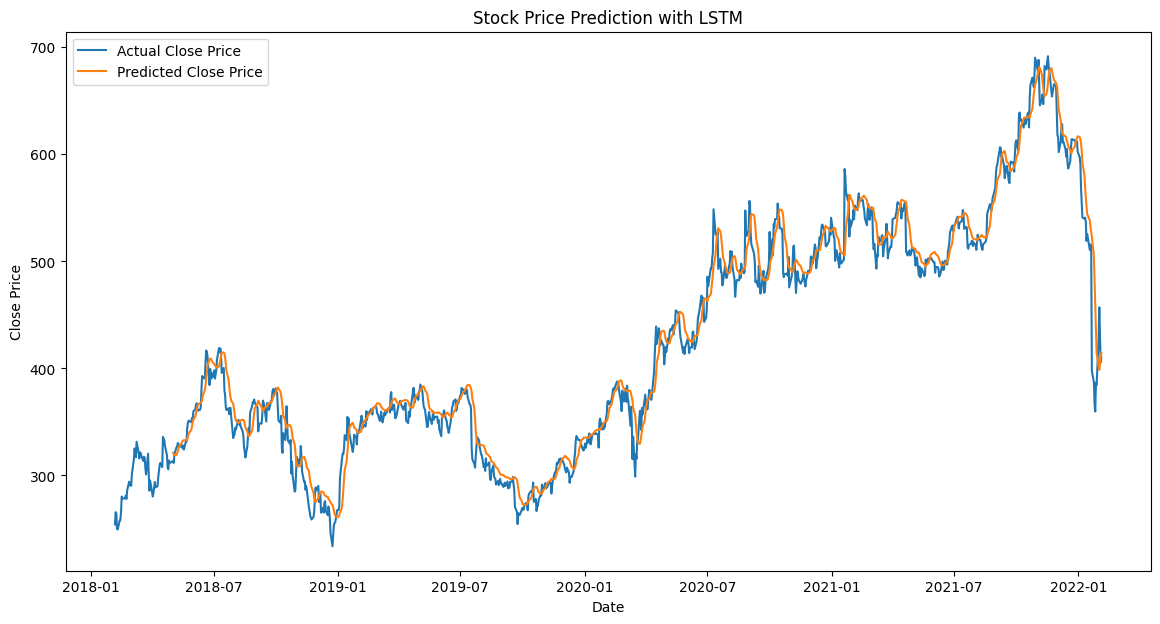

In [13]:

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load the Excel file
data = pd.read_excel('/content/dataset.xlsx.xlsx')

# Step 2: Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use only the 'Close' price for LSTM
data = data[['Close']]

# Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences of 60 days (you can adjust this window size)
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 3: Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Step 5: Make Predictions on Entire Dataset
all_data_scaled = scaler.transform(data)
all_X, _ = create_sequences(all_data_scaled, time_steps)
all_pred = model.predict(all_X)
all_pred = scaler.inverse_transform(all_pred)

data['Predicted_Close'] = np.nan
data.iloc[time_steps:, data.columns.get_loc('Predicted_Close')] = all_pred[:, 0]

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(data.index, data['Predicted_Close'], label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction with LSTM')
plt.legend()
plt.show()
